In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
#get dataset csv file
df = pd.read_csv("C:/Users/Efe/Downloads/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Renaming certain values for readability
df['Survived'] = df['Survived'].map({0:'Died',1:'Survived'})
df['Pclass'] = df['Pclass'].map({1:'First Class',2:'Second Class',3:'Third Class'})
df['Embarked'] = df['Embarked'].map({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

#create column for cabin level
df['Cabin'] = df['Cabin'].astype('str')
df['Cabin deck'] = df['Cabin'].apply(lambda x: x.split()[0][0])

#remove 'n' values indexed from 'nan'
def myfunc2(cd):
    cabindeck = cd
    if cabindeck == 'n':
        return ''
    else:
        return cabindeck
df['Cabin deck'] = df['Cabin deck'].apply(myfunc2)


In [5]:
#function to create records for children
def myfunc(passenger):
    age,sex = passenger
    if age < 16:
        return 'Child'
    else:
        return sex

#function to record if passenger travelled alone or not
def myfunc2(alone):
    SibSp,Parch = alone
    if SibSp > 0 or Parch > 0:
        return SibSp + Parch
    else:
        return 0
    
df['Passenger'] = df[['Age','Sex']].apply(myfunc,axis=1)
df['Amount People Travelled With'] = df[['SibSp','Parch']].apply(myfunc2,axis=1)
    
    

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin deck,Passenger,Amount People Travelled With
0,1,Died,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,Southampton,,male,1
1,2,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,C,female,1
2,3,Survived,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,Southampton,,female,0
3,4,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,C,female,1
4,5,Died,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,Southampton,,male,0


C:\Users\Efe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

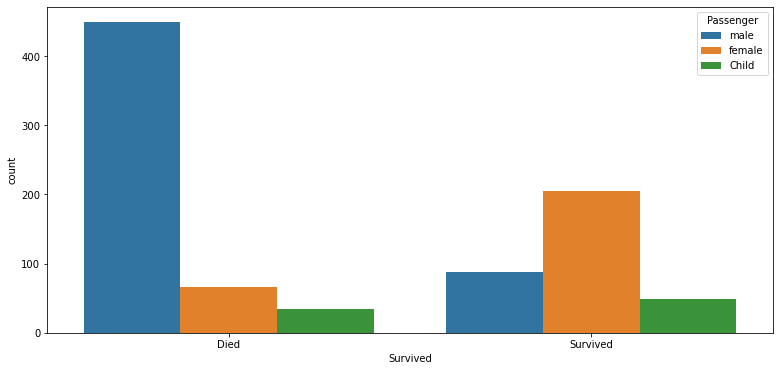

In [7]:
plt.figure(figsize=(13,6))
sns.countplot('Survived', hue='Passenger', data=df)


<AxesSubplot:>

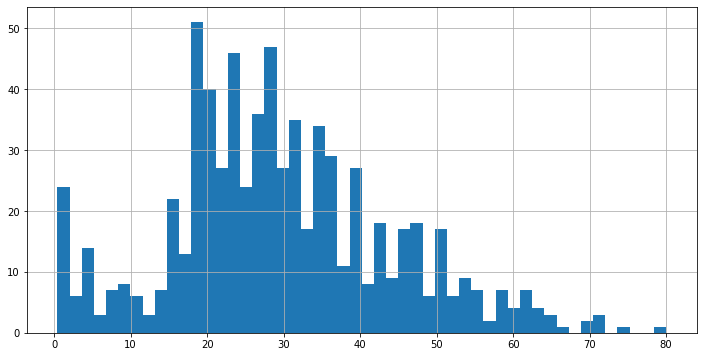

In [8]:
#overall age distribution for everyone on-board
df['Age'].hist(bins=50,figsize=(12,6))

C:\Users\Efe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

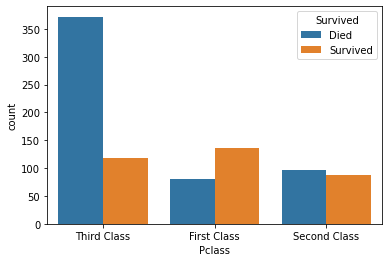

In [9]:
sns.countplot('Pclass',hue='Survived',data=df)

Text(0.5, 1.0, 'Age distribution for survivors vs dead')

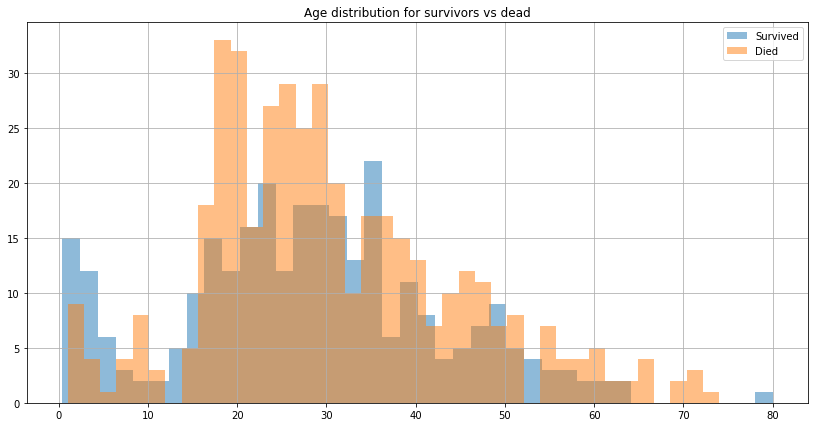

In [10]:
#Age distribution for those that lived
df[df['Survived']=='Survived']['Age'].hist(label='Survived',bins=40,alpha=0.5, figsize=(14,7))
#Age distribution for those thay Died
df[df['Survived']=='Died']['Age'].hist(label='Died',bins=40,alpha=0.5,figsize=(14,7))
plt.legend()
plt.title('Age distribution for survivors vs dead')


In [11]:
#change Survived column categorical values back to 1 and 0 in order to do regression plot
subdf = df
subdf['Survived'] = subdf['Survived'].map({'Survived':1,'Died':0})


C:\Users\Efe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Efe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


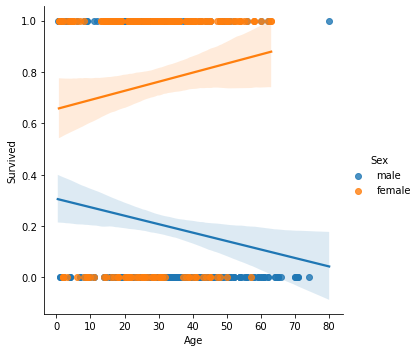

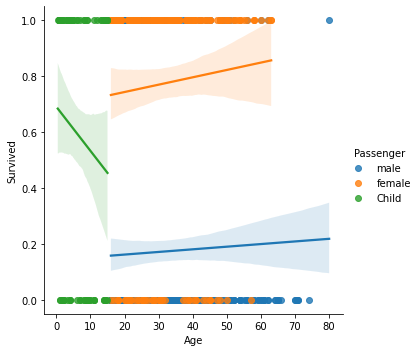

In [12]:
#running a regression plot to see how certain variables influenced a passengers chances of survival
sns.lmplot('Age','Survived',subdf,hue='Sex')
sns.lmplot('Age','Survived',subdf,hue='Passenger')

C:\Users\Efe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


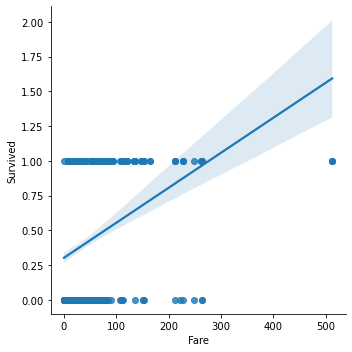

In [13]:
sns.lmplot('Fare','Survived', subdf)

C:\Users\Efe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


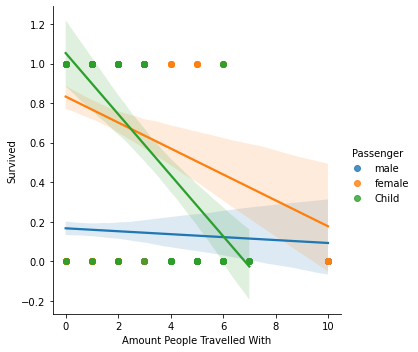

In [14]:
sns.lmplot('Amount People Travelled With','Survived',subdf, hue='Passenger')